# Text Classification

Attempting to classify text using K-Means clustering with the help of nltk.

## Requirements

In [78]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from string import punctuation
import nltk
from itertools import chain
# Install these if not already installed: punkt, stopwords
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

%matplotlib inline

In [45]:
def get_sentences():
    return ['I would like to create a task.', 'view task', 'view a task', 
            'create a task named foo', 'can i see my task list for groceries',
            'show task list groceries', 'show task lists', 'give me my task lists',
            'zevere, let me create a task called NewTask', 'Hey, can I create a task?']

sentences = get_sentences()

## Data Preprocessing

In [46]:
tokenized_sentences = []
for s in sentences:
    tokenized_sentences.append(word_tokenize(s.lower()))

for s in tokenized_sentences:
    print(s)

['i', 'would', 'like', 'to', 'create', 'a', 'task', '.']
['view', 'task']
['view', 'a', 'task']
['create', 'a', 'task', 'named', 'foo']
['can', 'i', 'see', 'my', 'task', 'list', 'for', 'groceries']
['show', 'task', 'list', 'groceries']
['show', 'task', 'lists']
['give', 'me', 'my', 'task', 'lists']
['zevere', ',', 'let', 'me', 'create', 'a', 'task', 'called', 'newtask']
['hey', ',', 'can', 'i', 'create', 'a', 'task', '?']


In [47]:
stop_words = set(stopwords.words('english') + list(punctuation))

print(', '.join(sorted([word for word in stop_words])))

!, ", #, $, %, &, ', (, ), *, +, ,, -, ., /, :, ;, <, =, >, ?, @, [, \, ], ^, _, `, a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, her, here, hers, herself, him, himself, his, how, i, if, in, into, is, isn, isn't, it, it's, its, itself, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she's, should, should've, shouldn, shouldn't, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, this, those, through, to, too, under, until, up, ve, very, was, wasn, 

In [48]:
filtered_sentences = []
for s in tokenized_sentences:
    filtered_s = [word for word in s if word not in stop_words]
    filtered_sentences.append(filtered_s)
filtered_sentences

[['would', 'like', 'create', 'task'],
 ['view', 'task'],
 ['view', 'task'],
 ['create', 'task', 'named', 'foo'],
 ['see', 'task', 'list', 'groceries'],
 ['show', 'task', 'list', 'groceries'],
 ['show', 'task', 'lists'],
 ['give', 'task', 'lists'],
 ['zevere', 'let', 'create', 'task', 'called', 'newtask'],
 ['hey', 'create', 'task']]

Frequency Distributions for each sentence:

[FreqDist({'would': 1, 'like': 1, 'create': 1, 'task': 1}), FreqDist({'view': 1, 'task': 1}), FreqDist({'view': 1, 'task': 1}), FreqDist({'create': 1, 'task': 1, 'named': 1, 'foo': 1}), FreqDist({'see': 1, 'task': 1, 'list': 1, 'groceries': 1}), FreqDist({'show': 1, 'task': 1, 'list': 1, 'groceries': 1}), FreqDist({'show': 1, 'task': 1, 'lists': 1}), FreqDist({'give': 1, 'task': 1, 'lists': 1}), FreqDist({'zevere': 1, 'let': 1, 'create': 1, 'task': 1, 'called': 1, 'newtask': 1}), FreqDist({'hey': 1, 'create': 1, 'task': 1})]

Frequency Distribution of all sentences:

('task', 10)
('create', 4)
('view', 2)
('list', 2)
('groceries', 2)
('show', 2)
('lists', 2)
('would', 1)
('like', 1)
('named', 1)
('foo', 1)
('see', 1)
('give', 1)
('zevere', 1)
('let', 1)
('called', 1)
('newtask', 1)
('hey', 1)


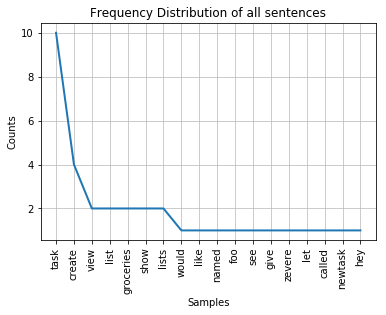

In [80]:
frequency_distributions = []
for s in filtered_sentences:
    frequency_distributions.append(FreqDist(s))
print('Frequency Distributions for each sentence:\n')
print(frequency_distributions)

total_frequencies = FreqDist(list(chain(*filtered_sentences)))
print('\nFrequency Distribution of all sentences:\n')
for w in total_frequencies.most_common():
    print("{}".format(w))

total_frequencies.plot(title='Frequency Distribution of all sentences')